In [1]:
import pandas as pd
import os
import numpy as np
from keras import utils
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [360]:
question5 = pd.read_csv('/kaggle/input/datasetar/Data/Question_5.csv', sep=',')
question5.head()

,ID,Question,Réponse,Score
0,5,من أول من آمنت بالنبي من النساء؟و من أول من آم...,خديجة بنت خويلد,1
1,5,من أول من آمنت بالنبي من النساء؟و من أول من آم...,السيدة خديجة -رضي الله عنها- أول من آمن بالنبي...,2
2,5,من أول من آمنت بالنبي من النساء؟و من أول من آم...,أبو بكر الصِّديق,1
3,5,من أول من آمنت بالنبي من النساء؟و من أول من آم...,أوّل من أسلم وآمن برسالة الإسلام من الرِّجال أ...,1
4,5,من أول من آمنت بالنبي من النساء؟و من أول من آم...,أول من آمنت بالنبيّ -صلى الله عليه وسلم من الن...,2


In [361]:
question5.isnull().sum()

ID          0
Question    0
Réponse     2
Score       0
dtype: int64

In [362]:
rows_with_null_values = question5[question5['Réponse'].isnull()]

# Now you can display or inspect the rows
print(rows_with_null_values)

    ID                                           Question Réponse  Score
25   5  من أول من آمنت بالنبي من النساء؟و من أول من آم...     NaN      0
33   5  من أول من آمنت بالنبي من النساء؟و من أول من آم...     NaN      2


In [363]:
# Assuming your DataFrame is named 'question4'
question5.dropna(subset=['Réponse'], inplace=True)


In [364]:
question5['Réponse'].isna().sum()

0

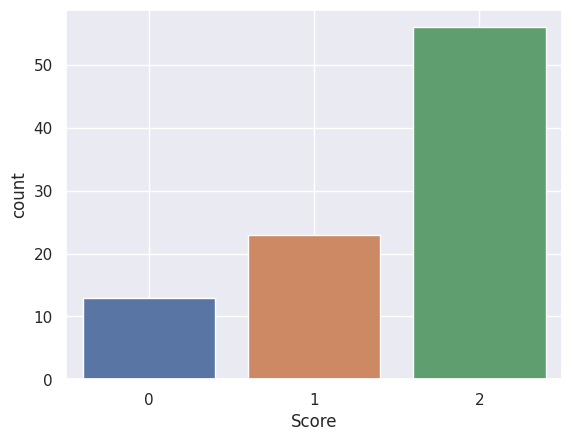

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = question5, x= 'Score')
plt.grid(True)
plt.show()

In [366]:
question5['Score'].unique()

array([1, 2, 0])

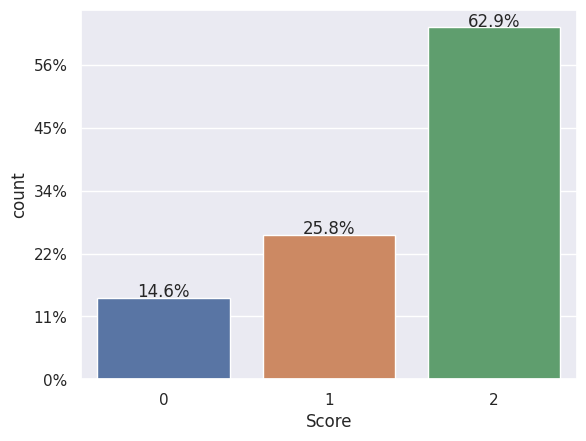

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'data' is your DataFrame and 'Score' is a column in your DataFrame
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(data=question5, x='Score')

# Calculate the percentage of each category
total = len(question1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center")

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.show()

In [368]:
question5.shape

(92, 4)

In [369]:
question5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 93
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        92 non-null     int64 
 1   Question  92 non-null     object
 2   Réponse   92 non-null     object
 3   Score     92 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ KB


In [370]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset
# Replace 'your_column' with the actual column name you want to check for duplicates

# Check for duplicates based on all columns
duplicate_rows = question5[question5.duplicated()]

# Check for duplicates based on a specific column
duplicate_rows_specific_column = question5[question5.duplicated(subset=['Réponse'])]

# Get the number of duplicates
num_duplicates = len(duplicate_rows)
num_duplicates_specific_column = len(duplicate_rows_specific_column)

print(f"Total duplicates: {num_duplicates}")
print(f"Duplicates in 'Réponse': {num_duplicates_specific_column}")


Total duplicates: 10
Duplicates in 'Réponse': 12


In [300]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
!pip install -U nltk

In [371]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
#stop_words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [372]:
#data avant stopwrds removed
question5['Réponse']

0                                       خديجة بنت خويلد
1     السيدة خديجة -رضي الله عنها- أول من آمن بالنبي...
2                                      أبو بكر الصِّديق
3     أوّل من أسلم وآمن برسالة الإسلام من الرِّجال أ...
4     أول من آمنت بالنبيّ -صلى الله عليه وسلم من الن...
                            ...                        
89    سيدتنا خديجة -رضي الله عنها- أول من آمنت بالنب...
90    أبو بكر الصديق -رضي الله عنه و أرضاه - هو أول ...
91    السيدة خديجة -رضي الله عنها و أرضاها - كانت أو...
92    أبو بكر الصديق -رضي الله عنه- هو أول من آمن با...
93    أبو بكر الصديق أول رجل آمن بالنبي وأوّل من أسل...
Name: Réponse, Length: 92, dtype: object

In [373]:
#Drop stop words
from nltk.stem.arlstem import ARLSTem
stemmmer = ARLSTem()

def remove_stowords(elements):
    corps = []
    for string in elements :
        string = nltk.sent_tokenize(string.strip())
        string = [ stemmmer.stem(word) for word in string if not word in stop_words ]
        string = ''.join(string)
        corps.append(string)
    return corps

In [375]:
corps5 = remove_stowords(question5['Réponse'])

In [377]:
#data after applying stopwords
# corps5

In [419]:
# tokenization
from keras.preprocessing.text import Tokenizer,text_to_word_sequence , one_hot , text_to_word_sequence
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




# Train tokenization
tokenizer = Tokenizer(filters=''''!"#$%&()+,-./:;<=>?@[\\]^{|}~\t\n÷×؛<>()&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
#tokenizer = Tokenizer(filters='#' )

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(corps5)

with open('TokenizerModel5.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(corps5)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(s) for s in sequences)
sequences = pad_sequences(sequences, max_sequence_length)

# Get the word-to-index mapping
vocab_dict = tokenizer.word_index

# Calculate the vocabulary size
vocab_size = len(vocab_dict) + 1

#print(vocab_dict)

In [420]:
max_sequence_length

32

In [421]:
vocab_size

114

In [38]:
!pip3 install gensim

In [39]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format("/kaggle/input/fast-text-translation-data/fast_text_files/vectors/wiki.ar.vec")

In [422]:
# Word Embedding
from keras.layers import Embedding
import numpy as np

# Embedding Dimension
EMBEDDING_DIM = 300

# Total number of words in the vocabulary, including an index for unknown words
num_words = len(vocab_dict) + 1

# Counter for words not present in the FastText model
count = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Iterate through each word in the vocabulary
for word, idx in vocab_dict.items():
    # Check if the word is present in the FastText model
    if word in fasttext_model:
        # If yes, assign the FastText model's embedding vector to the word in the matrix
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:
        # If the word is not present, increment the counter and print a message
        count += 1
        print("Word does not exist in the vocabulary ---> " + word)

       # Note: We could also assign a special embedding vector for unknown words.
        embedding_matrix[idx] = fasttext_model.get_vector("unk")

Word does not exist in the vocabulary ---> واسلمت
Word does not exist in the vocabulary ---> دتنا
Word does not exist in the vocabulary ---> ارضاها
Word does not exist in the vocabulary ---> بكرالصديق
Word does not exist in the vocabulary ---> ارضاه
Word does not exist in the vocabulary ---> وامنت


In [423]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.024347  , -0.019301  ,  0.075631  , ..., -0.023894  ,
         0.061126  ,  0.3175    ],
       [ 0.078865  ,  0.081889  , -0.095213  , ..., -0.038426  ,
        -0.054411  ,  0.06454   ],
       ...,
       [-0.074881  , -0.29646   ,  0.20881   , ..., -0.43155   ,
         0.21146999,  0.17804   ],
       [-0.50748003,  0.37588999,  0.23988999, ...,  0.10941   ,
        -1.01890004,  0.54113001],
       [-0.36570001,  0.55975997,  0.20366   , ...,  0.037459  ,
        -0.83033001,  0.41769999]])

In [424]:
X = sequences

In [425]:
# X

In [426]:
Score = question5['Score']
y = tf.keras.utils.to_categorical(
    Score, num_classes=3, dtype='float32'
)

In [427]:
# y

In [428]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [440]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.regularizers import l2

input_dim=vocab_size
output_dim=33
input_length=max_sequence_length


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(LSTM(units=10,kernel_regularizer=l2(0.001)))
model.add(Dense(3, activation='softmax'))

Epoch 1/80
2/2 [==============================] - 3s 644ms/step - loss: 1.1336 - accuracy: 0.3151 - val_loss: 1.1284 - val_accuracy: 0.5789
Epoch 2/80
2/2 [==============================] - 0s 164ms/step - loss: 1.1237 - accuracy: 0.6849 - val_loss: 1.1216 - val_accuracy: 0.5263
Epoch 3/80
2/2 [==============================] - 0s 165ms/step - loss: 1.1139 - accuracy: 0.6301 - val_loss: 1.1149 - val_accuracy: 0.5263
Epoch 4/80
2/2 [==============================] - 0s 169ms/step - loss: 1.1041 - accuracy: 0.6301 - val_loss: 1.1081 - val_accuracy: 0.5263
Epoch 5/80
2/2 [==============================] - 0s 169ms/step - loss: 1.0944 - accuracy: 0.6301 - val_loss: 1.1012 - val_accuracy: 0.5263
Epoch 6/80
2/2 [==============================] - 0s 169ms/step - loss: 1.0840 - accuracy: 0.6301 - val_loss: 1.0939 - val_accuracy: 0.5263
Epoch 7/80
2/2 [==============================] - 0s 37ms/step - loss: 1.0734 - accuracy: 0.6301 - val_loss: 1.0860 - val_accuracy: 0.5263
Epoch 8/80
2/2 [=====

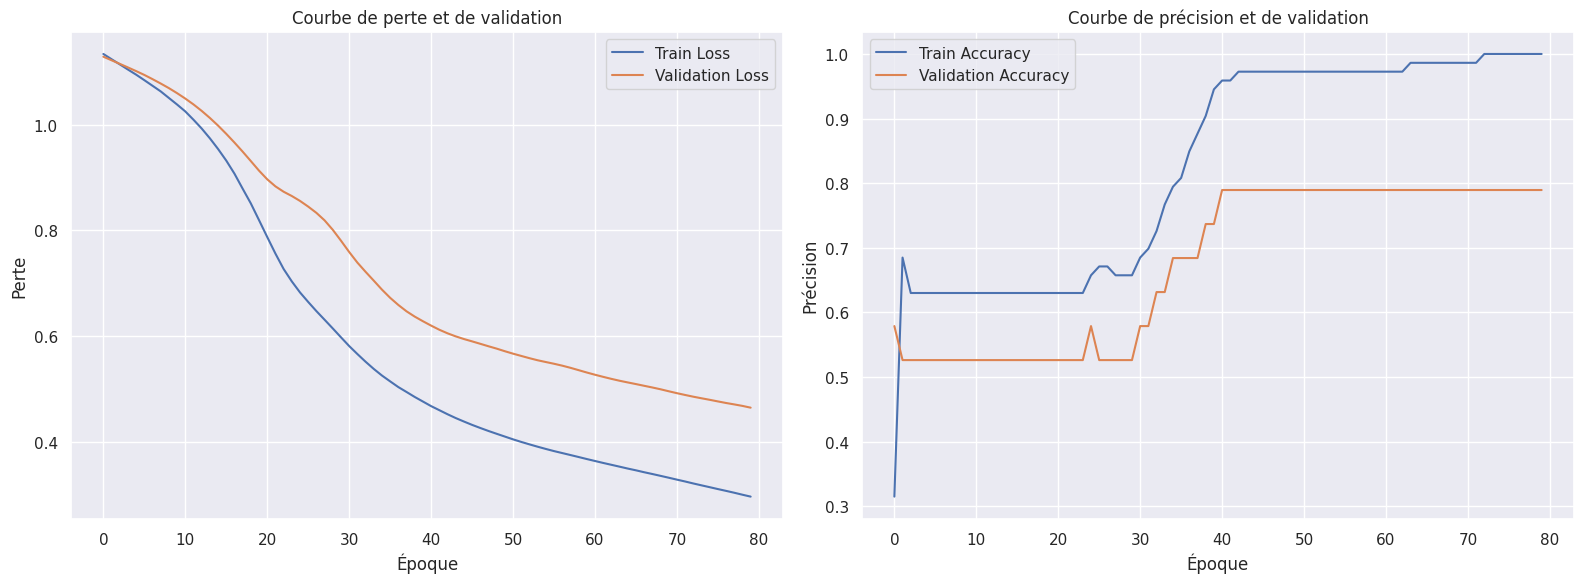

In [441]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64, epochs=80, verbose=1)



plt.figure(figsize=(16, 6))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()


# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [442]:
scores_trainig = model.evaluate(X_train, y_train, verbose=1)
print("Training Loss: %f%%" % (scores_trainig[0]))
print("Training Accuracy: %.2f%%" % (scores_trainig[1]*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 1.0000
Training Loss: 0.292936%
Training Accuracy: 100.00%


In [443]:
scores_test = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: %f%%" % (scores_test[0]))
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))

1/1 [==============================] - 0s 29ms/step - loss: 0.4648 - accuracy: 0.7895
Test Loss: 0.464797%
Test Accuracy: 78.95%


In [444]:
import numpy as np

def predict_sequence(model,response):
    
    response= remove_stowords(response)
    #print(corps)
# Convert texts to sequences of integers
    sequences = tokenizer.texts_to_sequences(response)

# Pad sequences to ensure uniform length

    sequences = pad_sequences(sequences, max_sequence_length)
   
    
    #print(sequences)
    # Reshape the input for model prediction
    #input_data = np.array([sequences])
    
    #print(input_data)
    # Make predictions
    predicted_probs = model.predict(sequences)
    predicted_value= np.argmax(predicted_probs, axis=1)
    
    #print(predicted_classes)
   
    return predicted_value[0]

In [447]:
test=['خديجة بنت خويلد']

In [448]:
predict_sequence(model,test)

1/1 [==============================] - 0s 20ms/step


1

In [449]:
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model5.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
